# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

def load_sign_names (sign_names_file):
    signames = []
    with open(sign_names_file) as _f:
        rows = csv.reader(_f, delimiter=',')
        next(rows, None)  # skip the headers
        for i, row in enumerate(rows):
            assert(i==int(row[0]))
            signames.append(row[1])
    return signames


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
sign_names = load_sign_names('signnames.csv')

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
#n_classes = y_train[0]
n_classes = np.unique(y_train).size

n_valid = X_valid.shape[0]

print("Number of training samples =", n_train)
print("Number of testing samples =", n_test)
print("Number of cross validation samples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training samples = 34799
Number of testing samples = 12630
Number of cross validation samples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

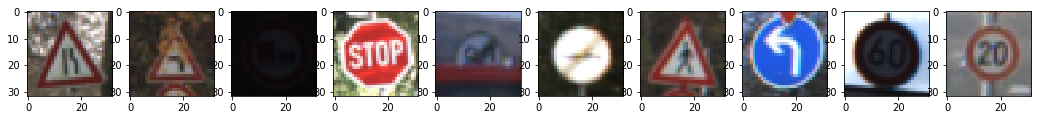

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_images_horizontally(list_of_images, number=10, gray=False):
    max_number_per_row = number
    fig = plt.figure(figsize=(18,18))
    count = len(list_of_images)
    for i in range(0, max_number_per_row):
        a=fig.add_subplot(1,max_number_per_row, i+1)
        index = random.randint(0, len(list_of_images))
        image = list_of_images[index].squeeze()
        if(gray): 
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)
      
        
show_images_horizontally(X_train)


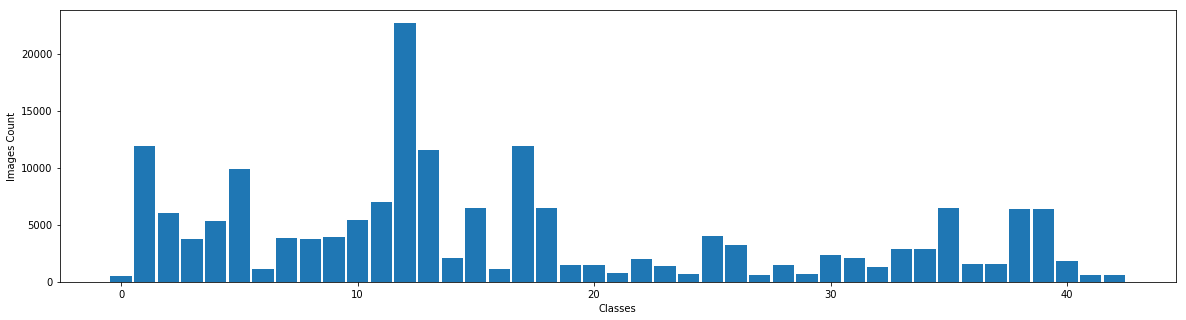

In [45]:

import numpy as np

# plot the classes distribution of the images

def plot_image_classes_distribution(y_dataset, number_of_classes):
    y_pos = range(number_of_classes)
    classes_list = y_dataset.tolist()
    sign_type = [classes_list.count(y) for y in range(number_of_classes)]

    plt.figure(figsize=(20,5))
    plt.bar(y_pos, sign_type, width=0.9, align='center')
    plt.ylabel('Images Count')
    plt.xlabel('Classes')    
    plt.show()

plot_image_classes_distribution(y_train, n_classes)  


In [32]:
classes, counts = np.unique(y_train, return_counts=True)
classes_count = dict(zip(classes, counts))
for class_index in sorted(classes_count, key=classes_count.get, reverse=True):
    print (class_index, sign_names[class_index], classes_count[class_index])
    print("{: >20} {: >20} {: >40}".format(class_index, sign_names[class_index], classes_count[class_index]))

                  12        Priority road                                    22680
                   1 Speed limit (30km/h)                                    11880
                  17             No entry                                    11880
                  13                Yield                                    11520
                   5 Speed limit (80km/h)                                     9900
                  11 Right-of-way at the next intersection                                     7020
                  15          No vehicles                                     6480
                  18      General caution                                     6480
                  35           Ahead only                                     6480
                  38           Keep right                                     6390
                  39            Keep left                                     6390
                   2 Speed limit (50km/h)                             

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [6]:

### Preprocess the data here.
import cv2
import numpy as np
from numpy import newaxis

def preprocess_data (images_array, tag='Samples'):
    print('--- Preprocess {}:'.format(tag))
    # convert to B/W. Images will have only 1 channel
    images_array_bw = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images_array])
    # apply histogram equalization
    images_hist = np.array([cv2.equalizeHist(image) for image in images_array_bw])
    # reshape
    images_reshaped = images_hist[..., newaxis]
    print('Before shaping:', images_hist.shape)
    print('After shaping:', images_reshaped.shape)
    # normalize range
    grayscale_max_value = np.max(images_reshaped)
    images_normalized = images_reshaped / grayscale_max_value
    print('Mean, min and max before normalizing:', np.mean(images_reshaped), np.min(images_reshaped), np.max(images_reshaped))
    print('Mean, min and max after normalizing:', np.mean(images_normalized), np.min(images_normalized), np.max(images_normalized))
                               
    return images_normalized

--- Preprocess X_train:
Before shaping: (34799, 32, 32)
After shaping: (34799, 32, 32, 1)
Mean, min and max before normalizing: 131.338788667 0 255
Mean, min and max after normalizing: 0.515054073205 0.0 1.0
--- Preprocess X_test:
Before shaping: (12630, 32, 32)
After shaping: (12630, 32, 32, 1)
Mean, min and max before normalizing: 131.743169088 0 255
Mean, min and max after normalizing: 0.516639878778 0.0 1.0
--- Preprocess X_valid:
Before shaping: (4410, 32, 32)
After shaping: (4410, 32, 32, 1)
Mean, min and max before normalizing: 131.611891254 0 255
Mean, min and max after normalizing: 0.516125063741 0.0 1.0


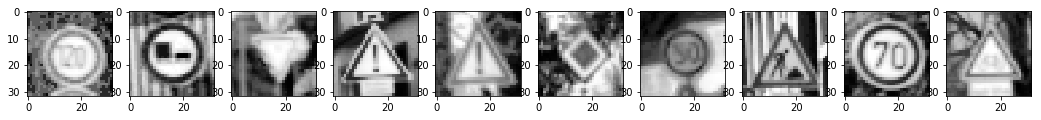

In [7]:
# Show example of preprocessing

X_train_normalized = preprocess_data(X_train, 'X_train')
X_test_normalized = preprocess_data(X_test, 'X_test')
X_valid_normalized = preprocess_data(X_valid, 'X_valid')
#ten_samples = preprocess_data(X_train[0:9], '10 samples')
show_images_horizontally(X_train_normalized, gray=True)

In [8]:
# This code is a simple approach of data augmentation by applying subtle flip modifications to the images.
# The specific code for flip_extend used in this cell was taken from http://navoshta.com/traffic-signs-classification/

import numpy as np
import cv2

def flip_extend(X, y):
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    return (X_extended, y_extended)


def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range, gray=False):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness     

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    if (not 'gray'):
        img = augment_brightness_camera_images(img)
    else:
        img = img[..., np.newaxis]
    
    return img

def transform_extend(samples, labels, n_transforms, gray=False):   
    if (len(samples) != len(labels)):
        raise ValueError('Samples and labels array must have the same length')
    samples_extended = []
    labels_extended = []
    for sample, label in zip(samples, labels):        
        for n in range(n_transforms):
            imt = transform_image(sample,20,10,5, gray)
            samples_extended.append(imt)
            labels_extended.append(label)
        if(len(samples_extended)%10000 == 0):
                print('Images processed: ', len(samples_extended))
    print('Total processed: ', len(samples_extended))
    
    samples_extended_array = np.append(samples, np.array(samples_extended), axis=0)
    labels_extended_array = np.append(labels, np.array(labels_extended), axis=0)
    
    return samples_extended_array, labels_extended_array

In [9]:
def augment_samples(samples, labels, n_transforms=2, gray=False):
    samples_extended, labels_extended = flip_extend(samples, labels)    
    samples_extended, labels_extended = transform_extend(samples_extended, labels_extended, n_transforms, gray)
    return samples_extended, labels_extended

In [10]:
X_train_extended, y_train_extended = augment_samples(X_train_normalized, y_train, gray=True)
X_train_extended, y_train_extended = shuffle(X_train_extended, y_train_extended)

Images processed:  10000
Images processed:  20000
Images processed:  30000
Images processed:  40000
Images processed:  50000
Images processed:  60000
Images processed:  70000
Images processed:  80000
Images processed:  90000
Images processed:  100000
Images processed:  110000
Total processed:  119576


Number of samples afer augmenting:  179364


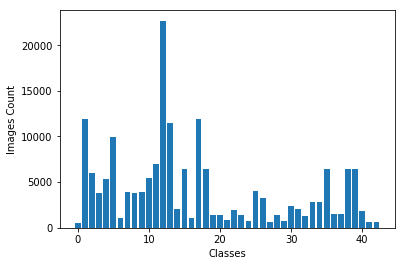

In [11]:
print('Number of samples afer augmenting: ', X_train_extended.shape[0])
plot_image_classes_distribution(y_train_extended, n_classes)

In [12]:
from sklearn.model_selection import train_test_split

# create validation set from training data
#X_train, X_valid, y_train, y_valid = train_test_split(X_train_extended, y_train_extended, test_size=0.2)
X_train, y_train, X_valid = X_train_extended, y_train_extended, X_valid_normalized

print('Number of samples for training: ', X_train.shape[0])
print('Number of samples for validation: ', X_valid.shape[0])

Number of samples for training:  179364
Number of samples for validation:  4410


### Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    #conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, 0.8)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    #conv2 = tf.nn.dropout(conv2, 0.5)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
  
    # Activation.
    fc1    = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(fc1, 0.5)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    #fc2    = tf.nn.dropout(fc2, 0.5)
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [16]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Train, Validate and Test the Model

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
import time

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    total_start_time =  time.time()
    for i in range(EPOCHS):
        start_time =  time.time()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time = {:.2f} sec".format(time.time() - start_time))
        print()
        
    saver.save(sess, './lenet_model_save')
    print("Model saved")
    print("Total time = {:.1f} minutes".format((time.time() - total_start_time)/60))

Training...

EPOCH 1 ...
Validation Accuracy = 0.758
Time = 86.28 sec

EPOCH 2 ...
Validation Accuracy = 0.830
Time = 128.15 sec

EPOCH 3 ...
Validation Accuracy = 0.837
Time = 87.60 sec

EPOCH 4 ...
Validation Accuracy = 0.872
Time = 93.18 sec

EPOCH 5 ...
Validation Accuracy = 0.896
Time = 91.90 sec

EPOCH 6 ...
Validation Accuracy = 0.906
Time = 89.91 sec

EPOCH 7 ...
Validation Accuracy = 0.922
Time = 90.60 sec

EPOCH 8 ...
Validation Accuracy = 0.912
Time = 132.14 sec

EPOCH 9 ...
Validation Accuracy = 0.903
Time = 90.66 sec

EPOCH 10 ...
Validation Accuracy = 0.920
Time = 89.21 sec

Model saved
Total time = 16.3 minutes


In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Test model accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.901


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

12569


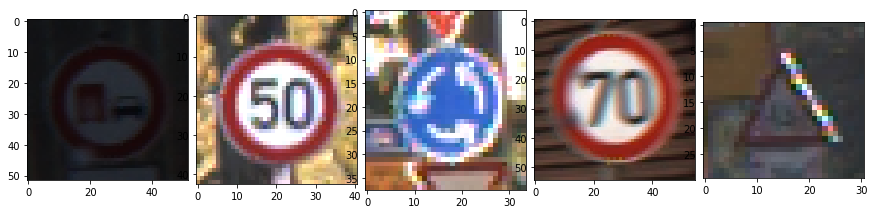

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
from sklearn.utils import shuffle

# test on own images
own_images = np.array([mpimg.imread("new-test-images/GTSRB/Online-Test/Images/" + imageName) for imageName in os.listdir("new-test-images/GTSRB/Online-Test/Images")])
print(own_images.size)

own_images = shuffle(own_images)
images_sample = own_images[0:5]

resized_images = np.array([cv2.resize(image, (32, 32)) for image in images_sample]) 

#for image in resized_images:
 #   print(image.shape)
  #  plt.imshow(image)
   # print()
    #plt.show()
    
count = len(resized_images)
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
fig.subplots_adjust(hspace = .5, wspace=.05)
axs = axs.ravel()
for i in range(0, count):
    image = own_images[i]
    axs[i].imshow(image)


### Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
print(resized_images.shape)
print('--- Preprocess images_sample:')                               
images_sample_normalized = preprocess_data(resized_images)

(5, 32, 32, 3)
--- Preprocess images_sample:
--- Preprocess Samples:
Before shaping: (5, 32, 32)
After shaping: (5, 32, 32, 1)
Mean, min and max before normalizing: 129.83046875 0 255
Mean, min and max after normalizing: 0.509139093137 0.0 1.0


Testing 5 test images...
Inferred classes: [ 2  2 40  4 29]


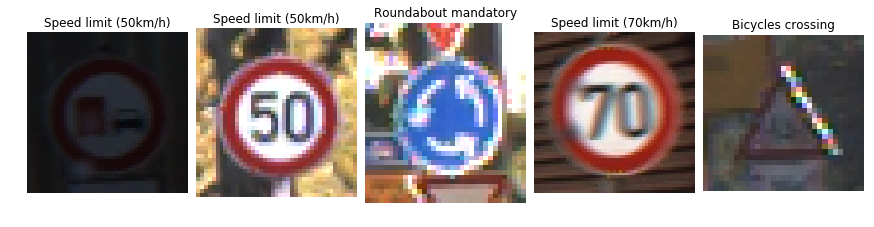

In [23]:
with tf.Session() as sess:
    print("Testing {} test images...".format(len(images_sample_normalized)))
    saver.restore(sess, './lenet_model_save')
    
    infer_sign_operation = tf.argmax(logits, 1)
    inferred_signs = sess.run(infer_sign_operation, feed_dict={x: images_sample_normalized})
    print("Inferred classes:", inferred_signs)

    count = len(images_sample_normalized)
    fig, axs = plt.subplots(1, 5, figsize=(15, 10))
    fig.subplots_adjust(hspace = .5, wspace=.05)
    axs = axs.ravel()
    for i in range(0, count):
        image = own_images[i]
        evaluated = inferred_signs[i]

        axs[i].axis('off')
        axs[i].set_title(sign_names[evaluated])
        axs[i].imshow(image)

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
predicted_correctly = 5
total_signs = 5
accuracy = predicted_correctly / total_signs * 100

print('--> Manually evaluated accuracy of the model for {} new signs: {} %'.format(total_signs, accuracy))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
keep_drop_out = 1.0
predicted_labels = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, './lenet_model_save')
    output = sess.run(predicted_labels, feed_dict={x:images_sample_normalized, keep_prob:keep_drop_out})
    final_out = sess.run(tf.nn.top_k(output, k=5))
    print(final_out)

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k_output = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: images_sample_normalized})
    print(top_k_output)


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(images_sample_normalized[0], fc1, activation_min=-1, activation_max=-1 ,plt_num=1)


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 